# MIS 583 Assignment 6: Text Sentiment Classification with Prompt Learning

Before we start, please put your name and SID in following format: <br>
: LASTNAME Firstname, ?00000000   //   e.g.) 李晨愷, M114020035

**Your Answer:**   
Hi I'm 賴壹誠, M124020042

## Overview

**Sentiment Classification** is an automated process of identifying opinions in text and labeling them as positive or negative based on the emotions customers express within them.

In Task 1, you need to fine-tune a pre-trained language model (e.g., BERT) to predict the sentiment of given tweets.

In Task 2, we employ prompts to enable the model to perform sentiment analysis through in-context learning, eliminating the need for additional training.

In Task 3, you will use the method called LM-BFF to utilize the model in generating the optimal template and verbalizer autonomously.


# Notice
**You are not allow to use the model like GPT family or pre-trained weight using SST-2 and twitter dataset!!!!!!!!!!!!!!!!!**

You can use BERT and RoBERTa encoder model

##  Versions of used packages

We will check PyTorch version to make sure everything work properly.  
We use `python==3.7.14`, `torch==1.12.1+cu113` and `torchvision==0.13.1+cu113`.  
This is the default version in Google Colab.

In [1]:
import sys
import torch
import torchvision
print('python', sys.version.split('\n')[0])
print('torch', torch.__version__)
print('torchvision', torchvision.__version__)

python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
torch 2.1.0+cu121
torchvision 0.16.0+cu121


# Task 1: Text Sentiment Classification (40 points)

In this task, you need to fine-tune a pre-trained language model (e.g., BERT or RoBERTa encoder) to predict the sentiment of given tweets.


## Loading Model and Data

First, let's talk about the model. The Hugging Face team has created an amazing framework called "transformers" for NLP tasks. It includes many state-of-the-art machine learning models for PyTorch, TensorFlow, and JAX.

To start with this package, follow [this link to installation and a basic tutorial](https://pytorch.org/hub/huggingface_pytorch-transformers/).

In [2]:
# you might need some additional installations there
!echo happy installation
!pip -V
!pip install grpcio
!pip install google-auth
!pip install protobuf==3.9.2
!pip install pyprind
!pip install tqdm boto3 requests regex sentencepiece sacremoses

happy installation
pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.9.2 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.9.2 which is incompatible.
google-cloud-aiplatform 1.38.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 12.0 MB/s eta 0:00:00


In [ ]:
from torch import nn

#########################################################################
#            Loading tokenizer and model from transformer               #
#########################################################################
# Model 1

#bert_type = 'bert-base-uncased'
#tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', bert_type)
#model = torch.hub.load('huggingface/pytorch-transformers', 'modelForSequenceClassification', bert_type)

# finetune from the output from bert to your task
#model.classifier = nn.Linear(768, 3, bias=True)

#########################################################################

# Model 2
from transformers import RobertaTokenizer, RobertaForSequenceClassification

bert_type = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(bert_type)
model = RobertaForSequenceClassification.from_pretrained(bert_type)

model.classifier.out_proj = nn.Linear(768, 3, bias=True)
#########################################################################
#                          End of your code                             #
#########################################################################

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## How to Get Data

Please open the file `twitter_sentiment.zip`, creat shortcut to your Google Drive.

1. open [LINK of Google Drive](https://drive.google.com/file/d/19Ty2lVAm55VL5QIM-MMQhhOzWXeMtxeV/view?usp=sharing)
2. Click "Add shortcut to Drive" in the top-right corner.
3. Select the location where you want to place the shortcut.
4. Click Add shortcut.

After above procedures, we have a shortcut of zip file of dataset.  
We can access this in colab after granting the permission of Google Drive.

---

請先到共用雲端硬碟將檔案 `twitter_sentiment.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/19Ty2lVAm55VL5QIM-MMQhhOzWXeMtxeV/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip Data

解壓縮 `twitter_sentiment.zip` 後可以發現裡面有三個csv檔。

- `train.csv`, `test.csv` and `val.csv`

Training set 有 **10248** 筆資料.  
Validation set 有 **1317** 筆資料.  
Testing set 有 **3075** 筆資料.  

注意: 若有另外設定存放在雲端硬碟中的路徑，請記得本處路徑也須做更動。

In [ ]:
!unzip -qq /content/drive/MyDrive/twitter_sentiment.zip

# Loading the dataset

In [ ]:
# Utility function to extract text and label from csv file
def get_texts(f_name='/content', mode='train'):
    text_list = []
    label_list = []

    f_path = os.path.join(f_name, '{}.csv'.format(mode))
    with open(f_path) as f:
        reader = csv.DictReader(f)
        for line in reader:
            text_list.append(line['text'])
            if mode != 'test':
                label_list.append(int(line['sentiment_label']))

    return text_list, label_list

In [ ]:
import os
import csv
import torch
from torch.utils.data import Dataset, DataLoader
class TwitterDataset(Dataset):
    def __init__(self, f_name='/content', mode='train'):
        self.mode = mode

        text_list, label_list = get_texts(f_name, mode)
        print('mode', mode, 'has', len(text_list), 'datas')
        text_list = tokenizer(text_list,
                             truncation=True, padding=True,
                             return_tensors='pt')

        self.text_list = text_list['input_ids']
        self.mask_list = text_list['attention_mask']

        self.label_list = label_list

    def __getitem__(self, idx):
        text = self.text_list[idx]
        mask = self.mask_list[idx]
        if self.mode == 'test':
            return text, mask
        label = torch.tensor(self.label_list[idx])
        return text, mask, label

    def __len__(self):
        return len(self.text_list)

## `DataLoader`

`torch.utils.data.DataLoader` define how to sample from `dataset` and some other function like:
+ `shuffle` : set to `True` to have the data reshuffled at every epoch
+ `batch_size` : how many samples per batch to load

See [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for more details

In [ ]:
dataset_train = TwitterDataset(mode='train')
dataset_val = TwitterDataset(mode='val')
dataset_test = TwitterDataset(mode='test')

batch_size = 64
train_data = DataLoader(dataset_train, batch_size=batch_size,
                       shuffle=True)
val_data = DataLoader(dataset_val, batch_size=batch_size // 2,
                       shuffle=False)
test_data = DataLoader(dataset_test, batch_size=batch_size // 2,
                       shuffle=False)

mode train has 10248 datas
mode val has 1317 datas
mode test has 3075 datas


In [ ]:
t = tokenizer.convert_ids_to_tokens(dataset_train[0][0]) # converts a sequence of numeric IDs in the training dataset into their corresponding tokens using the specified tokenizer.
print('token', t)
print('token to s', tokenizer.convert_tokens_to_string(t)) # converts a sequence of tokens (t) back into the original text string using the specified tokenizer.

token ['<s>', '@', 'united', 'ĠI', 'Ġhave', 'Ġnever', 'Ġbeen', 'Ġmislead', 'Ġby', 'Ġa', 'Ġcompany', 'Ġas', 'Ġmany', 'Ġtimes', 'Ġas', 'ĠI', 'Ġhave', 'Ġthis', 'Ġweek', 'Ġby', 'ĠUnited', 'ĠAirlines', '!', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'

# Define loss and optimizer

In [ ]:
device = torch.device('cuda')

from torch import nn
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Utility Function

In [ ]:
def accuracy(raw_preds, y):
    preds = raw_preds.argmax(dim=1)
    acc = (preds == y).sum()
    return acc

# Train function

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

train_loss_list = []
val_loss_list = []

def train(model, data, optimizer, criterion):
    model.train()

    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)

        #########################################################################
        #                          Testing process                              #
        #########################################################################
        # 1. Clean the gradients of optimizer
        optimizer.zero_grad()

        # 2. Put correct variables into model
        outputs = model(text, attention_mask=mask)

        # 3. Get prediction
        logits = outputs.logits

        # 4. Evaluate by criterion and accuracy
        loss = criterion(logits, label)
        acc = accuracy(logits, label)
        #########################################################################
        #                          End of your code                             #
        #########################################################################

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        train_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

def test(model, data, criterion, log_loss=False):
    model.eval()

    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)

        #########################################################################
        #                          Training process                             #
        #########################################################################
        # 1. Put correct variables into model
        with torch.no_grad():
            outputs = model(input_ids=text, attention_mask=mask)

        # 2. Get prediction
        logits = outputs.logits

        # 3. Evaluate by criterion and accuracy
        loss = criterion(logits, label)
        acc = accuracy(outputs.logits, label)
        #########################################################################
        #                          End of your code                             #
        #########################################################################

        epoch_loss += loss.item()
        if log_loss:
            val_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

# class for monitoring train and test acc/loss
class Meter:
    def __init__(self):
        self.train_loss_list = []
        self.train_acc_list = []
        self.val_loss_list = []
        self.val_acc_list = []

    def update(self, train_loss, train_acc, val_loss, val_acc):
        self.train_loss_list.append(train_loss)
        self.train_acc_list.append(train_acc)
        self.val_loss_list.append(val_loss)
        self.val_acc_list.append(val_acc)

    def plot(self):
        x = range(len(self.train_loss_list))
        plt.plot(x, self.train_loss_list)
        plt.plot(x, self.val_loss_list, color='r')
        plt.legend(['train_loss', 'val_loss'])
        plt.show()
        plt.plot(x, self.train_acc_list)
        plt.plot(x, self.val_acc_list, color='r')
        plt.legend(['train_acc', 'val_acc'])
        plt.show()

# Start Training

In [ ]:
#########################################################################
#                          Hyper-parameters                             #
#########################################################################
max_epoch = 5
log_interval = 1
best_acc = 0
#########################################################################
#                          End of your code                             #
#########################################################################

m = Meter()

for epoch in range(1, max_epoch + 1):
    train_loss, train_acc = train(model, train_data, optimizer, criterion)
    val_loss, val_acc = test(model, val_data, criterion, log_loss=True)

    if epoch % log_interval == 0:
        print('Epoch {} train_loss: {} train_acc: {}'.format(
            epoch, train_loss, train_acc
        ))
        print('Epoch {} val_loss:  {} val_acc : {}'.format(
            epoch, val_loss, val_acc
        ))

    m.update(train_loss, train_acc, val_loss, val_acc)

    # model checkpoint
    torch.save(model.state_dict(), '/content/e{}.pt'.format(epoch))
    if val_acc > best_acc:
        best_model = model
        best_acc = val_acc
        print('-'*10, 'e', epoch, 'save best model', '-'*10)

100%|██████████| 42/42 [00:01<00:00, 32.03it/s]


Epoch 1 train_loss: 0.009681120760605077 train_acc: 0.7335089773614364
Epoch 1 val_loss:  0.01256633299313084 val_acc : 0.8473804100227791
---------- e 1 save best model ----------


100%|██████████| 42/42 [00:01<00:00, 32.27it/s]


Epoch 2 train_loss: 0.006024616522529831 train_acc: 0.8510928961748634
Epoch 2 val_loss:  0.012202091831869488 val_acc : 0.853454821564161
---------- e 2 save best model ----------


100%|██████████| 42/42 [00:01<00:00, 32.04it/s]


Epoch 3 train_loss: 0.004988165227674489 train_acc: 0.8840749414519906
Epoch 3 val_loss:  0.012556343972286946 val_acc : 0.8526955201214882


100%|██████████| 42/42 [00:01<00:00, 32.12it/s]


Epoch 4 train_loss: 0.004327813705035386 train_acc: 0.8992974238875878
Epoch 4 val_loss:  0.012646270367113948 val_acc : 0.8618071374335611
---------- e 4 save best model ----------


100%|██████████| 42/42 [00:01<00:00, 32.34it/s]


Epoch 5 train_loss: 0.003573671732516632 train_acc: 0.9193013270882123
Epoch 5 val_loss:  0.013525102303795455 val_acc : 0.8542141230068337


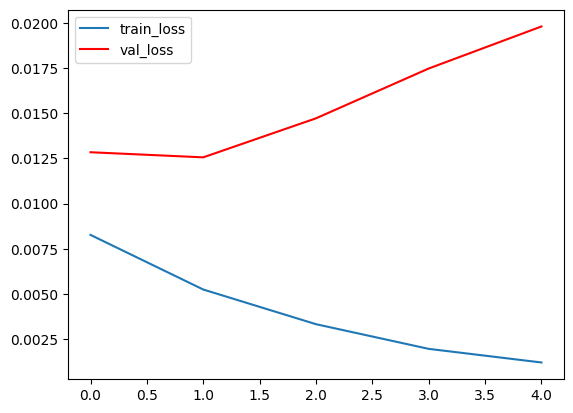

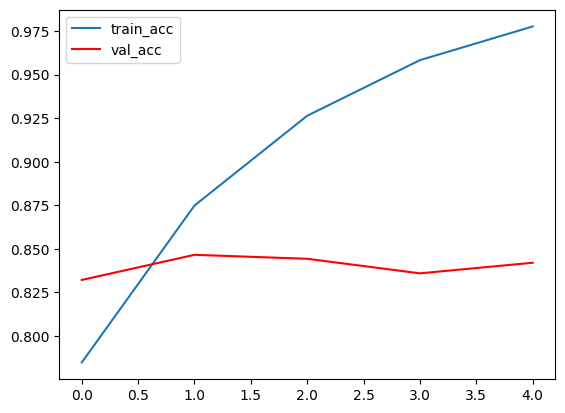

In [ ]:
# plot model 1 out
m.plot()

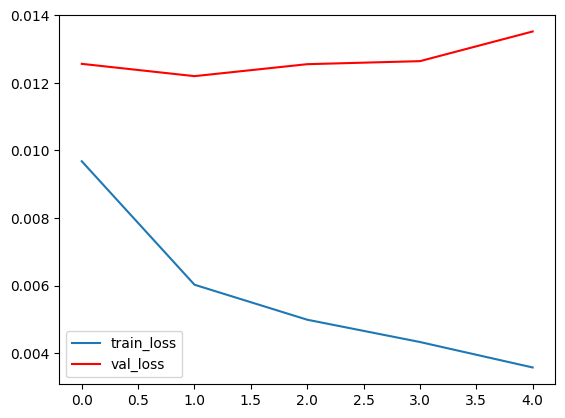

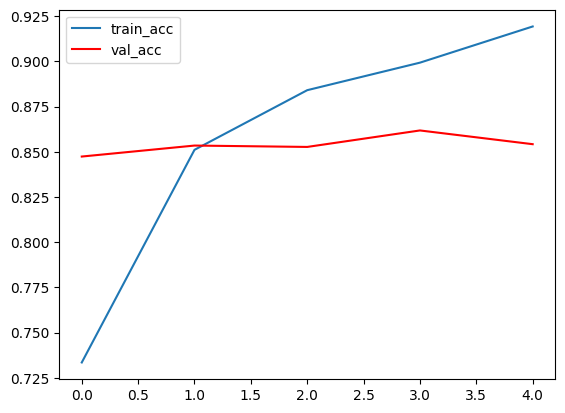

In [ ]:
# plot model 2 out
m.plot()

# Prediction

Predict the results based on testing set. Upload to [Kaggle](https://www.kaggle.com/t/f072e95f51bc48978225941dba218241).


In [ ]:
best_model.eval()

total_out = []
for text, mask in tqdm(test_data, total=len(test_data)):
    text = text.to(device)
    mask = mask.to(device)

    output = best_model(text, mask)
    pred = output.logits
    pred = torch.argmax(pred, dim=1)
    total_out.append(pred)

total_out = torch.cat(total_out).cpu().numpy().tolist()

with open('pred.csv', 'w') as f:
    f.write('index,sentiment_label\n')
    for i, pred in enumerate(total_out):
        f.write('{},{}\n'.format(i, pred))

100%|██████████| 97/97 [00:02<00:00, 33.85it/s]


# Task 2: In-Context learning (32 points)

In this task, you will learn how to perform sentiment classification using **prompts** without the need for training.

In [ ]:
import torch
import pyprind
import numpy as np
import pandas as pd
import torch.nn as nn
from transformers import BertConfig, BertTokenizer, BertForMaskedLM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading model and setup

In [ ]:
#########################################################################
#         TODO: Design your own template(prefix) and verbalizer         #
#########################################################################
class Config:
    def __init__(self):
        #zero-shot
        self.prefix = 'It was [MASK] sentence' # you can modify this line
        #one-shot
        self.prefix = ('It was good sentence. @united Thank you! Off to LA to do something very special.'
                'It was [MASK] sentence.')
        #few-shot
        self.prefix = ('It was good sentence. @united Thank you! Off to LA to do something very special.'
                'It was neutral sentence. @JetBlue I would fly somewhere hotter then here. Puerto Rico here I come. Lol'
                "It was bad sentence. @united No. SATO rebooked me. Just upset that my travel office had to fix this, and you couldn't."
                'It was [MASK] sentence.')
        self.verbalizer = {
            'good': 2,
            'neutral': 1,
            'bad': 0
        }

        self.max_seq_length = 512
        self.batch_size = 64


config = Config()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

bert_type = 'bert-base-uncased'

model = BertForMaskedLM.from_pretrained(bert_type, num_labels = 3)

tokenizer = BertTokenizer.from_pretrained(bert_type)

bert_config = BertConfig.from_pretrained(bert_type)

bert = model.from_pretrained(bert_type, config=bert_config).to(device)

#######################################################################
#                        End of your code                             #
#######################################################################

softmax = nn.Softmax(dim=1)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model t

## Obtaion verbalizer ids

In [ ]:
# Utility function to obtaion verbalizer ids
def obtain_verbalizer_ids(verbalizer, tokenizer):
    verbalizer_ids = tokenizer.convert_tokens_to_ids(list(verbalizer.keys()))
    index2ids = {i: verbalizer_ids[i] for i in range(len(verbalizer_ids))}
    return verbalizer_ids, index2ids


In [ ]:
verbalizer_ids, index2ids = obtain_verbalizer_ids(config.verbalizer, tokenizer)

## Concatenate original text and prefix

In [ ]:
# Utility function to concatenate prefix and text
def concatenate_prefix(texts, config):
    ##################################################
    #   TODO: concatenate your own prefix and text   #
    ##################################################
    prefix_texts = []
    for text in texts:
        prefix_texts.append('{}{}'.format(config.prefix, text))
    ##################################################
    #                 End of your code               #
    ##################################################
    return prefix_texts

In [ ]:
def load_data(config):
    # ['texts', 'labels']
    df = pd.read_csv('/content/train.csv')
    original_texts = df['text'].tolist()
    labels = df['sentiment_label'].tolist()

    texts = concatenate_prefix(original_texts, config)

    return texts, labels


texts, labels = load_data(config)

In [ ]:
# Batching of texts and labels for training or processing in batches
def pack_batch(texts, labels, batch_size):
    """
    :param texts: list
    :param labels: list
    :param batch_size: int
    :return batch_X: list
            [[text11, text12, ...], [text21, text22, ...], ...]
    :return batch_y: list
            [[label11, label12, ...], [label21, label22, ...], ...]
    :return batch_count: int
    """
    assert len(texts) == len(labels)

    if len(texts) % batch_size != 0:
        flag = False
        batch_count = int(len(texts) / batch_size) + 1
    else:
        flag = True
        batch_count = int(len(texts) / batch_size)

    batch_X, batch_y = [], []

    if flag:
        for i in range(batch_count):
            batch_X.append(texts[i * batch_size: (i + 1) * batch_size])
            batch_y.append(labels[i * batch_size: (i + 1) * batch_size])
    else:
        for i in range(batch_count):
            if i == batch_count - 1:
                batch_X.append(texts[i * batch_size:])
                batch_y.append(labels[i * batch_size:])
            else:
                batch_X.append(texts[i * batch_size: (i + 1) * batch_size])
                batch_y.append(labels[i * batch_size: (i + 1) * batch_size])

    return batch_X, batch_y, batch_count

In [ ]:
batch_X, batch_y, batch_count = pack_batch(texts, labels, config.batch_size)

## Inferencing the model without training

In [ ]:
with torch.no_grad():
    predict_all = np.array([], dtype=int)
    labels_all = np.array([], dtype=int)
    pper = pyprind.ProgPercent(batch_count)
    for i in range(batch_count):
        inputs = batch_X[i]
        labels = batch_y[i]

        # Using the BERT tokenizer (tokenizer.batch_encode_plus), adding special tokens, ensuring a maximum sequence length, and handling padding/truncation
        tokens = tokenizer.batch_encode_plus(inputs, add_special_tokens=True,
                                             max_length=config.max_seq_length,
                                             padding='max_length', truncation=True)

        ids = torch.tensor(tokens['input_ids']).to(device)
        attention_mask = torch.tensor(tokens['attention_mask']).to(device)

        # Shape: (batch_size, max_seq_length, vocab_size)
        logits = bert(ids, attention_mask=attention_mask).logits

        mask_token_index = (ids == tokenizer.mask_token_id).nonzero(as_tuple=True)

        # Find [MASK] logits
        # shape: (batch_size, vocab_size)
        masked_logits = logits[mask_token_index[0], mask_token_index[1], :]

        # Extract the logits of the word in the verbalizer at the [MASK] position
        # shape: (batch_size, verbalizer_size)
        verbalizer_logits = masked_logits[:, verbalizer_ids]

        # Construct a pseudo-distribution from the logits in these verbalizers
        pseudo_distribution = softmax(verbalizer_logits)

        #################################################################################
        #   1. Find the index with the maximum probability in the pseudo-distribution   #
        #   2. Convert the index to the corresponding word ID                           #
        #   3. Convert the ID to a token                                                #
        #   4. Find the label corresponding to the token                                #
        #################################################################################

        pred_indices = pseudo_distribution.argmax(axis=-1).tolist()

        pred_ids = [index2ids[index] for index in pred_indices]

        pred_tokens = tokenizer.convert_ids_to_tokens(pred_ids)

        pred_labels = [config.verbalizer[token] for token in pred_tokens]

        #################################################################################
        #                             End of your code                                  #
        #################################################################################

        predict_all = np.append(predict_all, pred_labels)
        labels_all = np.append(labels_all, labels)

        pper.update()

    acc = accuracy_score(labels_all, predict_all)
    p = precision_score(labels_all, predict_all, average="weighted")
    r = recall_score(labels_all, predict_all, average="weighted")
    f1 = f1_score(labels_all, predict_all, average="weighted")

    print('accuracy: %f | precision: %f | recall: %f | f1: %f' % (acc, p, r, f1))

#[100 %] Time elapsed: 00:01:59 | ETA: 00:00:00accuracy: 0.314598 | precision: 0.543655 | recall: 0.314598 | f1: 0.296825
#Total time elapsed: 00:01:59
#[100 %] Time elapsed: 00:01:58 | ETA: 00:00:00accuracy: 0.161397 | precision: 0.026049 | recall: 0.161397 | f1: 0.044858
#Total time elapsed: 00:01:58
#[100 %] Time elapsed: 00:02:06 | ETA: 00:00:00accuracy: 0.266686 | precision: 0.593466 | recall: 0.266686 | f1: 0.230853
#Total time elapsed: 00:02:06

[100 %] Time elapsed: 00:02:06 | ETA: 00:00:00

accuracy: 0.266686 | precision: 0.593466 | recall: 0.266686 | f1: 0.230853



Total time elapsed: 00:02:06
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 3: LM-BFF (45 points)

https://arxiv.org/pdf/2012.15723.pdf

Unlike the previous task, LM-BFF can generate templates and verbalizers automatically.

# Get Data

請先到共用雲端硬碟將檔案 `SST-2.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/14MDYFasXU94dUE9DjgfcZE61iTRI2007/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

# Install openprompt

This library provides a standard, flexible and extensible framework to deploy the prompt-learning pipeline.

[OpenPrompt Documentation](https://thunlp.github.io/OpenPrompt/)

In [2]:
!pip install openprompt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.99
    Uninstalling sentencepiece-0.1.99:
      Successfully uninstalled sentencepiece-0.1.99
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.9.2
    Uninstalling protobuf-3.9.2:
      Successfully uninstalled protobuf-3.9.2
ERROR: pip's dependency resolver does not currently take into account all the pac

# Import openprompt package

In [3]:
from openprompt.plms import load_plm
from openprompt.prompts.prompt_generator import T5TemplateGenerator
from openprompt.pipeline_base import PromptDataLoader, PromptForClassification
from openprompt.prompts import ManualTemplate
from openprompt.trainer import ClassificationRunner
import copy
import torch
from transformers import  AdamW, get_linear_schedule_with_warmup
import numpy as np

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


# Setup cuda and whether to perform automatic generation

In [1]:
cuda = True
auto_t = True # Whether to perform automatic template generation
auto_v = True # Whether to perform automatic verbalizer generation

# Load dataset and model

In [ ]:
!unzip -qq /content/drive/MyDrive/SST-2.zip

In [2]:
from openprompt.data_utils.text_classification_dataset import SST2Processor
dataset = {}
dataset['train'] = SST2Processor().get_train_examples("/content/SST-2/")
dataset['validation'] = SST2Processor().get_dev_examples("/content/SST-2/")
dataset['test'] = SST2Processor().get_test_examples("/content/SST-2/")

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [4]:
#print('load model...')
from openprompt.plms import load_plm

# load mlm model for main tasks
plm, tokenizer, model_config, WrapperClass = load_plm("roberta", "roberta-large")

# load generation model for template generation
template_generate_model, template_generate_tokenizer, template_generate_model_config, template_tokenizer_wrapper = load_plm('t5', 't5-large')

from openprompt.prompts import ManualVerbalizer, ManualTemplate

# if you wish to do automatic label word generation, the verbalizer is not the final verbalizer, and is only used for template generation.
verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=[['terrible'],['great']]) # Manually generate the verbalizer


###################################################################################################################
#   TODO: You need to switch LMBFFTemplateGenerationTemplate or ManualTemplate to                                 #
#         compare auto generate template and manual generate template                                             #
###################################################################################################################
from openprompt.prompts.prompt_generator import LMBFFTemplateGenerationTemplate

############################################
#   LMBFFTemplateGenerationTemplate        #
############################################

import random

# number of demonstrations
num_demonstrations = 1  # try different number

demonstrations = []

for _ in range(num_demonstrations):
    # random choice training set example with label 0
    random_example_1 = random.choice([example for example in dataset['train'] if example.label == 0])

    # random choice training set example with label 1
    random_example_2 = random.choice([example for example in dataset['train'] if example.label == 1])

    demonstration = f'{random_example_1.text_a} It was terrible. {random_example_2.text_a} It was great.'
    demonstrations.append(demonstration)

# You can modify the demonstrations and try different combinations
template_text = '{"placeholder": "text_a"} {"mask"} {"meta": "labelword"} {"mask"}.' + ' '.join(demonstrations)
template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)

#############################################
#   End of LMBFFTemplateGenerationTemplate  #
#############################################

########################################
#          ManualTemplate              #
########################################

#template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} It was {"mask"}.')
#template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} It was {"mask"} sentence.')
#template = ManualTemplate(tokenizer=tokenizer, text='{"placeholder":"text_a"} This is {"mask"}')

########################################
#          End of ManualTemplate       #
########################################

###################################################################################################################
#                                           End of your code                                                      #
###################################################################################################################


# view wrapped example
wrapped_example = template.wrap_one_example(dataset['train'][0])
print("dataset:", dataset['train'][0])


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


dataset: {
  "guid": "train-0",
  "label": 0,
  "meta": {
    "labelword": "terrible"
  },
  "text_a": "nothing happens , and it happens to flat characters .",
  "text_b": "",
  "tgt_text": null
}



# Utility Function

In [5]:
from openprompt.plms import load_plm
from openprompt.prompts.prompt_generator import T5TemplateGenerator
from openprompt.pipeline_base import PromptDataLoader, PromptForClassification
from openprompt.prompts import ManualTemplate
from openprompt.trainer import ClassificationRunner
import copy
import torch
from transformers import  AdamW, get_linear_schedule_with_warmup
import numpy as np

# Returns the best evaluation score achieved during training
def fit(model, train_dataloader, val_dataloader, loss_func, optimizer):
    best_score = 0.0
    for epoch in range(5):
        train_loss = train_epoch(model, train_dataloader, loss_func, optimizer)
        score = evaluate(model, val_dataloader)
        if score > best_score:
            best_score = score
        print(f"Epoch {epoch+1}: Train loss={train_loss}, Eval score={score}")
    return best_score

# Trains the model on the training data and computes the training loss
def train_epoch(model, train_dataloader, loss_func, optimizer):
    model.train()
    loss_all = []
    for step, inputs in enumerate(train_dataloader):
        if cuda:
            inputs = inputs.cuda()
        #####################################################
        # 1. Put correct variables into model to get logits #
        # 2. Get labels                                     #
        # 3. Evalutate using loss_func                         #
        # 4. Append loss to loss_all                        #
        #####################################################
        logits = model(inputs)
        labels = inputs['label']
        loss = loss_func(logits, labels)
        loss.backward()
        loss_all.append(loss.item())
        #####################################################
        #                 End of your code                  #
        #####################################################
        optimizer.step()
        optimizer.zero_grad()
    return np.mean(loss_all)

def evaluate(model, val_dataloader):
    model.eval()
    allpreds = []
    alllabels = []
    with torch.no_grad():
        for step, inputs in enumerate(val_dataloader):
            if cuda:
                inputs = inputs.cuda()
            #####################################################
            # 1. Put correct variables into model to get logits #
            # 2. Get labels                                     #
            # 3. Extend labels to list                          #
            # 4. Get predictions and extend preds to list        #
            #####################################################
            logits = model(inputs)
            labels = inputs['label']
            alllabels.extend(labels.cpu().tolist())
            allpreds.extend(torch.argmax(logits, dim=-1).cpu().tolist())
            #####################################################
            #                 End of your code                  #
            #####################################################
    acc = sum([int(i==j) for i,j in zip(allpreds, alllabels)])/len(allpreds)
    return acc

# Automatic template generation

Generated template from TemplateGenerator and find the best template

In [6]:
from tqdm import tqdm

class ManualTemplateWithoutParse(ManualTemplate):
    """The generated template from TemplateGenerator is a list of dict of parsed template_text. So no further parsing is needed."""
    def on_text_set(self):
        pass

# Template generation
if auto_t:
    print('performing auto_t...')

    if cuda:
        template_generate_model = template_generate_model.cuda()

    # Creates an instance of T5TemplateGenerator, used for generating text templates
    template_generator = T5TemplateGenerator(template_generate_model, template_generate_tokenizer, template_tokenizer_wrapper, verbalizer, beam_width=5) # Beam_width is set to 5 here for efficiency; to improve performance, try a larger number.


    dataloader = PromptDataLoader(dataset['train'], template, tokenizer=template_generate_tokenizer, tokenizer_wrapper_class=template_tokenizer_wrapper, batch_size=len(dataset['train']), decoder_max_length=128, max_seq_length=128, shuffle=False, teacher_forcing=False) # Register all data at once
    for data in dataloader:
        if cuda:
            data = data.cuda()
        template_generator._register_buffer(data)

    template_generate_model.eval()
    print('generating...')
    template_texts = template_generator._get_templates() # Calls _get_templates on template_generator to generate template texts.

    # Converting and Printing Templates
    original_template = template.text
    template_texts = [template_generator.convert_template(template_text, original_template) for template_text in template_texts]
    # template_generator._show_template()
    template_generator.release_memory()
    # Generate a number of candidate template text
    print(template_texts)

    # Iterate over each candidate and select the best one
    best_metrics = 0.0
    best_template_text = None
    for template_text in tqdm(template_texts):
        verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=[['terrible'],['great']])
        template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)
        print(f"current template: {template_text}, wrapped example: {template.wrap_one_example(dataset['train'][0])}")

        train_dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, shuffle=True)
        valid_dataloader = PromptDataLoader(dataset['validation'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)

        model = PromptForClassification(copy.deepcopy(plm), template, verbalizer)

        loss_func = torch.nn.CrossEntropyLoss()
        no_decay = ['bias', 'LayerNorm.weight']
        # it's always good practice to set no decay to bias and LayerNorm parameters
        optimizer_grouped_parameters = [
            {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]

        optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
        if cuda:
            model = model.cuda()
        score = fit(model, train_dataloader, valid_dataloader, loss_func, optimizer)

        #######################################################
        # TODO: Use score to Find your best template_text     #
        #######################################################
        if score > best_metrics:
          print('current best score:', score)
          best_metrics = score
          best_template_text = template_text
        #######################################################
        #                 End of your code                    #
        #######################################################
    # Use the best template
    verbalizer = ManualVerbalizer(tokenizer=tokenizer, num_classes=2, label_words=[['terrible'],['great']])
    template = LMBFFTemplateGenerationTemplate(tokenizer=template_generate_tokenizer, verbalizer=verbalizer, text=template_text)
    print("final best template:", best_template_text)
    print("wrapped example:", template.wrap_one_example(dataset["train"][0]))

performing auto_t...


tokenizing: 32it [00:00, 981.70it/s]


generating...


100%|██████████| 18/18 [00:32<00:00,  1.82s/it]


['{"placeholder": "text_a"} It was {"mask"} ..nothing happens , and it happens to flat characters . It was terrible. the filmmakers \' eye for detail and the high standards of performance convey a strong sense of the girls \' environment . It was great.', '{"placeholder": "text_a"} It was {"mask"} . nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers \' eye for detail and the high standards of performance convey a strong sense of the girls \' environment . It was great.', '{"placeholder": "text_a"} It was {"mask"} . Nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers \' eye for detail and the high standards of performance convey a strong sense of the girls \' environment . It was great.', '{"placeholder": "text_a"} It was {"mask"} . It was terrible.nothing happens , and it happens to flat characters . It was terrible. the filmmakers \' eye for detail and the high standards of performance

  0%|          | 0/5 [00:00<?, ?it/s]

current template: {"placeholder": "text_a"} It was {"mask"} ..nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " ..nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.", 'loss_ids': 0, 'shortenable_ids': 0}], {'guid': 'train-0', 'label': 0}]



tokenizing: 32it [00:00, 680.58it/s]

tokenizing: 32it [00:00, 741.04it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.7267895046234116, Eval score=0.5
Epoch 2: Train loss=0.8011372680775821, Eval score=0.5
Epoch 3: Train loss=1.1083605382591486, Eval score=0.5
Epoch 4: Train loss=0.7803267920389771, Eval score=0.5


 20%|██        | 1/5 [00:32<02:11, 32.98s/it]

Epoch 5: Train loss=0.7312171850353479, Eval score=0.5
current best score: 0.5
current template: {"placeholder": "text_a"} It was {"mask"} . nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.", 'loss_ids': 0, 'shortenable_ids': 0}], {'guid': 'train-0', 'label': 0}]



tokenizing: 32it [00:00, 849.33it/s]

tokenizing: 32it [00:00, 854.85it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.413563657780287, Eval score=0.5
Epoch 2: Train loss=1.006263020914048, Eval score=0.5
Epoch 3: Train loss=0.9151670658029616, Eval score=0.5
Epoch 4: Train loss=0.8256131904199719, Eval score=0.5


 40%|████      | 2/5 [01:05<01:38, 32.72s/it]

Epoch 5: Train loss=0.7483857637271285, Eval score=0.5
current template: {"placeholder": "text_a"} It was {"mask"} . Nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . Nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.", 'loss_ids': 0, 'shortenable_ids': 0}], {'guid': 'train-0', 'label': 0}]



tokenizing: 32it [00:00, 834.27it/s]

tokenizing: 32it [00:00, 805.91it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.018016946314674, Eval score=0.8125
Epoch 2: Train loss=0.19564957156217133, Eval score=0.8125
Epoch 3: Train loss=0.05072247516591233, Eval score=0.84375
Epoch 4: Train loss=0.0014944602127116013, Eval score=0.84375


 60%|██████    | 3/5 [01:38<01:05, 32.64s/it]

Epoch 5: Train loss=0.0007024452478390231, Eval score=0.84375
current best score: 0.84375
current template: {"placeholder": "text_a"} It was {"mask"} . It was terrible.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . It was terrible.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.", 'loss_ids': 0, 'shortenable_ids': 0}], {'guid': 'train-0', 'label': 0}]



tokenizing: 32it [00:00, 930.34it/s]

tokenizing: 32it [00:00, 923.35it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.6506765446065401, Eval score=0.5
Epoch 2: Train loss=0.6007442872505635, Eval score=0.75
Epoch 3: Train loss=0.2948214469361119, Eval score=0.78125
Epoch 4: Train loss=0.020257511442650866, Eval score=0.75


 80%|████████  | 4/5 [02:10<00:32, 32.60s/it]

Epoch 5: Train loss=0.0018295265263077454, Eval score=0.75
current template: {"placeholder": "text_a"} It was {"mask"} . It was horrible.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great., wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . It was horrible.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.", 'loss_ids': 0, 'shortenable_ids': 0}], {'guid': 'train-0', 'label': 0}]



tokenizing: 32it [00:00, 834.76it/s]

tokenizing: 32it [00:00, 867.58it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.2908626004791586, Eval score=0.5
Epoch 2: Train loss=1.2150078967679292, Eval score=0.5
Epoch 3: Train loss=0.9964714931556955, Eval score=0.5
Epoch 4: Train loss=0.8002308644354343, Eval score=0.5


100%|██████████| 5/5 [02:43<00:00, 32.64s/it]

Epoch 5: Train loss=0.3035358934357646, Eval score=0.84375
final best template: {"placeholder": "text_a"} It was {"mask"} . Nothing happens.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.
wrapped example: [[{'text': 'nothing happens , and it happens to flat characters .', 'loss_ids': 0, 'shortenable_ids': 1}, {'text': ' It was', 'loss_ids': 0, 'shortenable_ids': 0}, {'text': '<mask>', 'loss_ids': 1, 'shortenable_ids': 0}, {'text': " . It was horrible.nothing happens , and it happens to flat characters . It was terrible. the filmmakers ' eye for detail and the high standards of performance convey a strong sense of the girls ' environment . It was great.", 'loss_ids': 0, 'shortenable_ids': 0}], {'guid': 'train-0', 'label': 0}]


# Automatic erbalizer generation

Verbalizer template from VerbalizerGenerator and find the best verbalizer

In [7]:
# Verbalizer generation
from openprompt.prompts.prompt_generator import RobertaVerbalizerGenerator
if auto_v:
    print('performing auto_v...')
    # Load generation model for verbalizer generation
    if cuda:
        plm = plm.cuda()

    # Creates an instance of RobertaVerbalizerGenerator, used for generating verbalizer.
    verbalizer_generator = RobertaVerbalizerGenerator(model=plm, tokenizer=tokenizer, candidate_num=20, label_word_num_per_class=20) # To improve performance, try larger numbers


    dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, batch_size=32)
    for data in dataloader:
        if cuda:
            data = data.cuda()
        verbalizer_generator.register_buffer(data)

    # Calls generate on verbalizer_generator to generate label words.
    label_words_list = verbalizer_generator.generate()
    verbalizer_generator.release_memory()

    # Iterate over each candidate and select the best one
    current_verbalizer = copy.deepcopy(verbalizer)
    best_metrics = 0.0
    best_label_words = None
    for label_words in tqdm(label_words_list):
        current_verbalizer.label_words = label_words
        train_dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, shuffle=True)
        valid_dataloader = PromptDataLoader(dataset['validation'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)

        model = PromptForClassification(copy.deepcopy(plm), template, current_verbalizer)

        loss_func = torch.nn.CrossEntropyLoss()
        no_decay = ['bias', 'LayerNorm.weight']
        # it's always good practice to set no decay to bias and LayerNorm parameters
        optimizer_grouped_parameters = [
            {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]

        optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
        if cuda:
            model = model.cuda()
        score = fit(model, train_dataloader, valid_dataloader, loss_func, optimizer)

        #######################################################
        # TODO: Use score to find your best_label_word        #
        #######################################################
        if score > best_metrics:
          best_metrics = score
          best_label_words = label_words
        #######################################################
        #                 End of your code                    #
        #######################################################
    # use the best verbalizer
    print("final best label words:", best_label_words)
    verbalizer = ManualVerbalizer(tokenizer, num_classes=2, label_words=best_label_words)

performing auto_v...


tokenizing: 32it [00:00, 835.90it/s]
  0%|          | 0/20 [00:00<?, ?it/s]
tokenizing: 32it [00:00, 820.53it/s]

tokenizing: 32it [00:00, 833.71it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.9374506701360583, Eval score=0.5
Epoch 2: Train loss=0.7918533310294151, Eval score=0.5
Epoch 3: Train loss=0.7183117010863498, Eval score=0.53125
Epoch 4: Train loss=0.39191851779963827, Eval score=0.71875


  5%|▌         | 1/20 [00:32<10:19, 32.62s/it]

Epoch 5: Train loss=0.17704938629464095, Eval score=0.65625



tokenizing: 32it [00:00, 856.37it/s]

tokenizing: 32it [00:00, 849.98it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.9883377967498461, Eval score=0.5
Epoch 2: Train loss=0.7580417906865478, Eval score=0.5
Epoch 3: Train loss=0.6200372667517513, Eval score=0.65625
Epoch 4: Train loss=0.2516229210232268, Eval score=0.71875


 10%|█         | 2/20 [01:05<09:47, 32.66s/it]

Epoch 5: Train loss=0.04169396889028576, Eval score=0.84375



tokenizing: 32it [00:00, 846.90it/s]

tokenizing: 32it [00:00, 884.03it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.812608568240421, Eval score=0.5
Epoch 2: Train loss=0.8077201889827847, Eval score=0.5
Epoch 3: Train loss=0.6497455495409667, Eval score=0.5
Epoch 4: Train loss=1.0008085925946943, Eval score=0.8125


 15%|█▌        | 3/20 [01:37<09:14, 32.64s/it]

Epoch 5: Train loss=0.18039189780483866, Eval score=0.78125



tokenizing: 32it [00:00, 862.51it/s]

tokenizing: 32it [00:00, 893.33it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.236831958658936, Eval score=0.5
Epoch 2: Train loss=1.2353272777982056, Eval score=0.5
Epoch 3: Train loss=1.0645763808279298, Eval score=0.5
Epoch 4: Train loss=1.3057622377527878, Eval score=0.5


 20%|██        | 4/20 [02:10<08:42, 32.66s/it]

Epoch 5: Train loss=1.0378194882068783, Eval score=0.5



tokenizing: 32it [00:00, 850.90it/s]

tokenizing: 32it [00:00, 886.64it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.4355380375874311, Eval score=0.5
Epoch 2: Train loss=0.9617924060439691, Eval score=0.5
Epoch 3: Train loss=0.9188556736335158, Eval score=0.53125
Epoch 4: Train loss=0.453969488342409, Eval score=0.75


 25%|██▌       | 5/20 [02:43<08:09, 32.62s/it]

Epoch 5: Train loss=0.16765900950474588, Eval score=0.71875



tokenizing: 32it [00:00, 889.04it/s]

tokenizing: 32it [00:00, 887.91it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.5197939625486239, Eval score=0.5
Epoch 2: Train loss=1.027739125129301, Eval score=0.59375
Epoch 3: Train loss=0.41427029616897926, Eval score=0.71875
Epoch 4: Train loss=0.47830140379301156, Eval score=0.8125


 30%|███       | 6/20 [03:16<07:38, 32.74s/it]

Epoch 5: Train loss=0.15942440218930187, Eval score=0.8125



tokenizing: 32it [00:00, 874.10it/s]

tokenizing: 32it [00:00, 826.78it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.2557434427647607, Eval score=0.5
Epoch 2: Train loss=0.6796893366554286, Eval score=0.90625
Epoch 3: Train loss=0.11394625114189694, Eval score=0.9375
Epoch 4: Train loss=0.4792825633785469, Eval score=0.75


 35%|███▌      | 7/20 [03:48<07:04, 32.69s/it]

Epoch 5: Train loss=0.04055410459841369, Eval score=0.9375



tokenizing: 32it [00:00, 941.56it/s]

tokenizing: 32it [00:00, 809.24it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.092133565024932, Eval score=0.71875
Epoch 2: Train loss=0.8886536408681422, Eval score=0.875
Epoch 3: Train loss=0.43324497689900454, Eval score=0.8125
Epoch 4: Train loss=0.023934261860631523, Eval score=0.84375


 40%|████      | 8/20 [04:21<06:32, 32.68s/it]

Epoch 5: Train loss=0.02732760719364924, Eval score=0.8125



tokenizing: 32it [00:00, 861.34it/s]

tokenizing: 32it [00:00, 612.76it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.945512945027076, Eval score=0.75
Epoch 2: Train loss=0.6413265998417046, Eval score=0.75
Epoch 3: Train loss=0.288743234046251, Eval score=0.84375
Epoch 4: Train loss=0.29496925146531794, Eval score=0.75


 45%|████▌     | 9/20 [04:54<05:59, 32.68s/it]

Epoch 5: Train loss=0.21361239749194283, Eval score=0.8125



tokenizing: 32it [00:00, 878.91it/s]

tokenizing: 32it [00:00, 898.93it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.1396518480462703, Eval score=0.5
Epoch 2: Train loss=0.8804445420391858, Eval score=0.78125
Epoch 3: Train loss=0.42588469793554395, Eval score=0.5625
Epoch 4: Train loss=0.07172682167364908, Eval score=0.8125


 50%|█████     | 10/20 [05:26<05:26, 32.67s/it]

Epoch 5: Train loss=0.10669710917982433, Eval score=0.78125



tokenizing: 32it [00:00, 863.77it/s]

tokenizing: 32it [00:00, 910.36it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.0532239730819093, Eval score=0.5
Epoch 2: Train loss=0.6489300772082061, Eval score=0.75
Epoch 3: Train loss=0.43594328931430937, Eval score=0.6875
Epoch 4: Train loss=0.2506642077860306, Eval score=0.6875


 55%|█████▌    | 11/20 [05:59<04:53, 32.66s/it]

Epoch 5: Train loss=0.21153400516277543, Eval score=0.65625



tokenizing: 32it [00:00, 853.47it/s]

tokenizing: 32it [00:00, 925.77it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.318792501398015, Eval score=0.5
Epoch 2: Train loss=0.583833520358894, Eval score=0.78125
Epoch 3: Train loss=0.24417299785818614, Eval score=0.8125
Epoch 4: Train loss=0.5391875717668881, Eval score=0.78125


 60%|██████    | 12/20 [06:31<04:21, 32.65s/it]

Epoch 5: Train loss=0.17337099819201285, Eval score=0.75



tokenizing: 32it [00:00, 890.27it/s]

tokenizing: 32it [00:00, 820.23it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=3.0091238808672323, Eval score=0.5
Epoch 2: Train loss=1.0637028249911964, Eval score=0.5
Epoch 4: Train loss=0.7721439674496651, Eval score=0.5


 65%|██████▌   | 13/20 [07:04<03:48, 32.63s/it]

Epoch 5: Train loss=0.8827176687773317, Eval score=0.5



tokenizing: 32it [00:00, 876.05it/s]

tokenizing: 32it [00:00, 883.21it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.4716174147906713, Eval score=0.65625
Epoch 2: Train loss=0.45717310307736625, Eval score=0.78125
Epoch 3: Train loss=0.028476003247305925, Eval score=0.90625
Epoch 4: Train loss=0.07381831936761785, Eval score=0.84375


 70%|███████   | 14/20 [07:37<03:15, 32.62s/it]

Epoch 5: Train loss=1.0618087489630739, Eval score=0.53125



tokenizing: 32it [00:00, 847.88it/s]

tokenizing: 32it [00:00, 828.38it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.0988158151808882, Eval score=0.5
Epoch 2: Train loss=1.1403272082097828, Eval score=0.5
Epoch 3: Train loss=0.757068333303323, Eval score=0.59375
Epoch 4: Train loss=1.1135396480676718, Eval score=0.5


 75%|███████▌  | 15/20 [08:09<02:43, 32.61s/it]

Epoch 5: Train loss=0.7996166655793786, Eval score=0.5



tokenizing: 32it [00:00, 919.19it/s]

tokenizing: 32it [00:00, 905.86it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.2803049790672958, Eval score=0.5
Epoch 2: Train loss=0.39622191734815715, Eval score=0.90625
Epoch 3: Train loss=0.07730226966123155, Eval score=0.90625
Epoch 4: Train loss=0.6165514868889659, Eval score=0.90625


 80%|████████  | 16/20 [08:42<02:10, 32.59s/it]

Epoch 5: Train loss=0.092402060792665, Eval score=0.90625



tokenizing: 32it [00:00, 832.93it/s]

tokenizing: 32it [00:00, 925.42it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.1068820372609665, Eval score=0.8125
Epoch 2: Train loss=0.8225207935456638, Eval score=0.78125
Epoch 3: Train loss=0.27571887451449584, Eval score=0.875
Epoch 4: Train loss=0.15993760561877934, Eval score=0.84375


 85%|████████▌ | 17/20 [09:14<01:37, 32.58s/it]

Epoch 5: Train loss=0.1224779284244164, Eval score=0.90625



tokenizing: 32it [00:00, 877.61it/s]

tokenizing: 32it [00:00, 862.84it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.081234410047456, Eval score=0.5
Epoch 2: Train loss=0.6864551863400266, Eval score=0.875
Epoch 3: Train loss=0.27821816887444584, Eval score=0.78125
Epoch 4: Train loss=0.2520600649742448, Eval score=0.875


 90%|█████████ | 18/20 [09:47<01:05, 32.58s/it]

Epoch 5: Train loss=0.000791631129235526, Eval score=0.875



tokenizing: 32it [00:00, 892.69it/s]

tokenizing: 32it [00:00, 898.48it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=2.166211401082677, Eval score=0.5
Epoch 2: Train loss=0.941179160377942, Eval score=0.875
Epoch 3: Train loss=0.16432819068722893, Eval score=0.90625
Epoch 4: Train loss=0.5561930317044244, Eval score=0.5


 95%|█████████▌| 19/20 [10:20<00:32, 32.59s/it]

Epoch 5: Train loss=0.906854687287705, Eval score=0.78125



tokenizing: 32it [00:00, 801.08it/s]

tokenizing: 32it [00:00, 901.60it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.5697893797187135, Eval score=0.5
Epoch 2: Train loss=0.7809863991569728, Eval score=0.96875
Epoch 3: Train loss=0.5998297968326369, Eval score=0.78125
Epoch 4: Train loss=0.3641861348951352, Eval score=0.875


100%|██████████| 20/20 [10:52<00:00, 32.63s/it]

Epoch 5: Train loss=0.0007216266942293714, Eval score=0.84375
final best label words: ['bad', 'great']


# Evaluation

In [8]:
train_dataloader = PromptDataLoader(dataset['train'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass, shuffle=True)
valid_dataloader = PromptDataLoader(dataset['validation'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)
test_dataloader = PromptDataLoader(dataset['test'], template, tokenizer=tokenizer, tokenizer_wrapper_class=WrapperClass)


model = PromptForClassification(copy.deepcopy(plm), template, verbalizer)
loss_func = torch.nn.CrossEntropyLoss()
no_decay = ['bias', 'LayerNorm.weight']
# It's always good practice to set no decay to bias and LayerNorm parameters
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
if cuda:
    model = model.cuda()
score = fit(model, train_dataloader, valid_dataloader, loss_func, optimizer)

tokenizing: 32it [00:00, 884.67it/s]
tokenizing: 32it [00:00, 908.65it/s]
tokenizing: 872it [00:01, 774.11it/s]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: Train loss=1.1287253352966218, Eval score=0.84375
Epoch 2: Train loss=0.3393759313621558, Eval score=0.875
Epoch 3: Train loss=0.08284084852516571, Eval score=0.875
Epoch 4: Train loss=0.04505563928143275, Eval score=0.8125
Epoch 5: Train loss=0.0005523529694795304, Eval score=0.8125


# Prediction

Predict the results based on testing set. Upload to [Kaggle](https://www.kaggle.com/t/5b8876ed26fd495b8353ad7ce94b6f65).

In [9]:
model.eval()

allpreds = []
for step, inputs in enumerate(test_dataloader):
    if cuda:
        inputs = inputs.cuda()
    logits = model(inputs)
    allpreds.extend(torch.argmax(logits, dim=-1).cpu().tolist())

with open('pred.csv', 'w') as f:
    f.write('index,sentiment_label\n')
    for i, pred in enumerate(allpreds):
        f.write('{},{}\n'.format(i, pred))

# Report (15 points)

- Task 1: Compare **two** different models you employed and provide a brief discussion of your implementation.

- Task 2: You need to try at least **three** different templates and verbalizers to compare how your prompts work with the model. Report your performance in zero-shot, one-shot, and few-shot scenarios, with examples drawn from the training set.

- Task 3: Try at least three different manually crafted templates to compare them with auto-generated templates. Evaluate the performance with different numbers of demonstrations and plot the graph from Figure 3 in the paper (https://arxiv.org/pdf/2012.15723.pdf). Also, report your best template and verbalizer.
